# Geothermal Feasibility Study



In [1]:
import sys  
sys.path.insert(0, 'Libraries/') 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
xl = pd.ExcelFile('Climate/Burlington, VT 2021-01-01 to 2021-12-31.xlsx')

In [7]:
weather = pd.read_excel("Climate/Burlington, VT 2021-01-01 to 2021-12-31.xlsx",
                        sheet_name=xl.sheet_names[0],header=0,
                        converters= {'datetime': pd.to_datetime},)
weather = weather.set_index('datetime')
weather.head(1) 

name  temp  feelslike  dew  humidity  precip  \
datetime                                                             
2021-01-01  Burlington, VT  -3.9       -7.7 -8.8      68.6     0.0   

            precipprob  preciptype  snow  snowdepth  ...  sealevelpressure  \
datetime                                             ...                     
2021-01-01         NaN         NaN   0.0        6.3  ...            1030.1   

            cloudcover  visibility  solarradiation  solarenergy  uvindex  \
datetime                                                                   
2021-01-01        48.8        16.0             NaN          NaN      NaN   

            severerisk        conditions                 icon  \
datetime                                                        
2021-01-01         NaN  Partially cloudy  partly-cloudy-night   

                                                     stations  
datetime                                                       
2021-01-01  72622564776,KPBG,KBTV,KMVL,72611454771,7261701...  

[1 rows x 23 columns]

In [9]:
weather.columns

Index(['name', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon',
       'stations'],
      dtype='object')

In [10]:
interp_method = 'linear' 
weather['solarradiation'] = weather['solarradiation'].fillna(0.0)
weather['cloudcover'] = weather['cloudcover'].fillna(0.0)
weather['precip'] = weather['precip'].fillna(0.0)
weather['windspeed'] = weather['windspeed'].interpolate(interp_method)
weather['temp'] = weather['temp'].interpolate(interp_method)
weather['solarradiation'] = weather['solarradiation'].interpolate(interp_method)
weather['cloudcover'] = weather['cloudcover'].interpolate(interp_method)
weather['dew'] = weather['dew'].interpolate(interp_method)
weather['precip'] = weather['precip'].interpolate(interp_method)
weather['humidity'] = weather['humidity'].interpolate(interp_method)

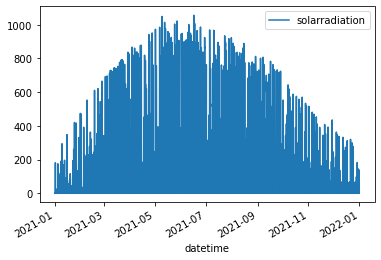

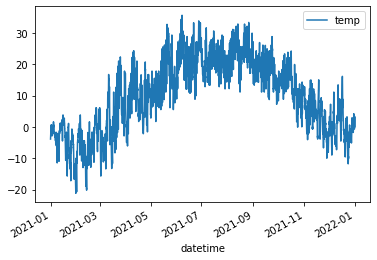

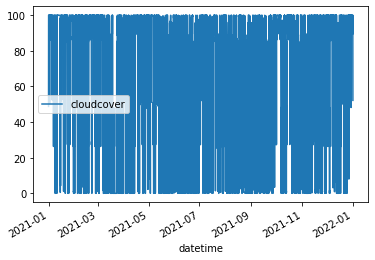

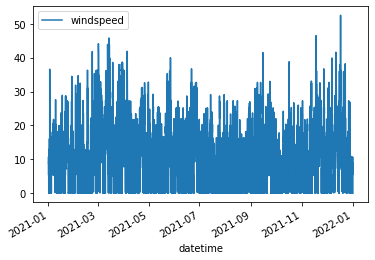

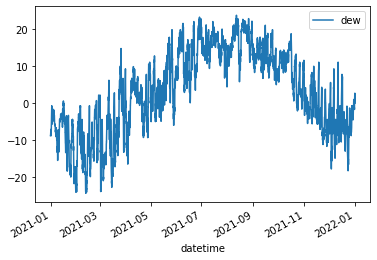

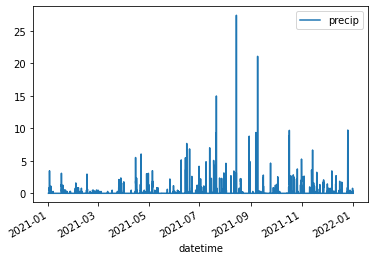

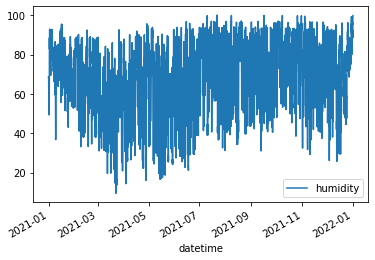

In [12]:
ax0 = weather.plot(y='solarradiation')
ax0 = weather.plot(y='temp')
ax0 = weather.plot(y='cloudcover')
ax0 = weather.plot(y='windspeed')
ax0 = weather.plot(y='dew')
ax0 = weather.plot(y='precip')
ax0 = weather.plot(y='humidity')

In [14]:
from scipy.interpolate import interp1d
interp_method = 'cubic'

t_data = np.arange(0,weather.shape[0]*15*60,15*60)
U_atm = np.abs(weather['windspeed'][:].to_numpy()/3.6) #converted from km/h to m/s
T_atm = weather['temp'][:].to_numpy()
q_sun = weather['solarradiation'][:].to_numpy()
# CC = weather['Cloud Cover'][:].to_numpy()
cc = weather['cloudcover'][:].to_numpy()/100. # converted from % to fraction
rh = weather['humidity'][:].to_numpy() # left as %
p_r = weather['precip'][:].to_numpy()*1e-3/(15*60) #converted to mm to m/s 
T_dp = weather['dew'][:].to_numpy()
f_U_atm = interp1d(t_data,U_atm,kind=interp_method)
def U_atmospheric(t):
    global f_U_atm
    return np.maximum(f_U_atm(t),0.)
f_T_atm = interp1d(t_data,T_atm,kind=interp_method)
def T_atmospheric(t):
    global f_T_atm
    return f_T_atm(t)
f_q_sun = interp1d(t_data,q_sun,kind=interp_method)
def sun_irradiation(t):
    global f_q_sun
    return np.maximum(f_q_sun(t),0.)
f_CC = interp1d(t_data,cc,kind=interp_method)
def cloud_cover(t):
    global f_CC
    return np.clip(f_CC(t),0.,1.)
f_T_dp = interp1d(t_data,T_dp,kind=interp_method)
def dew_point(t):
    global f_T_dp
    return f_T_dp(t)
f_RH = interp1d(t_data,rh,kind=interp_method)
def relative_humidity(t):
    global f_RH
    return np.clip(f_RH(t),0.,100.)
f_rain = interp1d(t_data,p_r,kind=interp_method)
def rain_rate(t):
    global f_rain
    return np.maximum(f_rain(t),0.)
